In [15]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns

In [16]:
import os 
os.listdir('/Users/keithmitchell/Desktop/Repositories/error.correction.benchmarking/code.evaluation/scripts')

['RSR_Analysis.ipynb',
 'igh.csv',
 'TRA_Analysis.ipynb',
 '.DS_Store',
 'T1_Analysis.ipynb',
 'data_metrics.py',
 'ec_summary.py',
 'igh_cont.csv',
 'IGH_Analysis.ipynb',
 'figures',
 'ec_evaluation.py',
 'ec_data_compression.py',
 '.ipynb_checkpoints',
 'data',
 'analysis.R',
 '.idea']

In [17]:
os.chdir('/Users/keithmitchell/Desktop/Repositories/error.correction.benchmarking/code.evaluation/scripts/data')
data = pd.read_csv('t1_from_master.csv')
print(data.columns)
data["Trim Effeciency"] = data["Base - TP TRIM"]/(data["Base - TP TRIM"] + data["Base - FP TRIM"])
data.head()

Index(['Unnamed: 0', 'EC Filename', 'Wrapper Name', 'Kmer Size', 'Read - TP',
       'Read - TN', 'Read - FN', 'Read - FN WRONG', 'Read - FP',
       'Read - FP INDEL', 'Total Trimmed Reads', 'Total Reads', 'Base - TP',
       'Base - TN', 'Base - FN', 'Base - FN WRONG', 'Base - FP',
       'Base - FP INDEL', 'Base - FP TRIM', 'Base - TP TRIM', 'Total Bases',
       'Tool', 'Coverage', 'Length', 'Base Sensitivity', 'Base Precision',
       'Base Gain', 'Base Accuracy', 'Dataset', 'Trim Percent',
       'Trim Effeciency'],
      dtype='object')


,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Tool,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency
0,30,bfc_t1_wgsim_rl__cov_1.1_12.corrected.fastq.gz,run.bfc.sh,12,168,24846,16547,38,5101,0,...,Bfc,1,100,0.038381,0.069400,-0.476274,0.992578,T1,0.0,NaN
1,31,bfc_t1_wgsim_rl__cov_1.1_14.corrected.fastq.gz,run.bfc.sh,14,196,21280,14150,41,11033,0,...,Bfc,1,100,0.053077,0.059695,-0.782986,0.991041,T1,0.0,NaN
2,37,bfc_t1_wgsim_rl__cov_2.1_16.corrected.fastq.gz,run.bfc.sh,16,261,18808,12274,61,15296,0,...,Bfc,2,100,0.059131,0.055013,-0.956580,0.990260,T1,0.0,NaN
3,39,bfc_t1_wgsim_rl__cov_2.1_12.corrected.fastq.gz,run.bfc.sh,12,202,21045,13866,70,11517,0,...,Bfc,2,100,0.039830,0.032307,-1.153195,0.989320,T1,0.0,NaN
4,40,bfc_t1_wgsim_rl__cov_1.1_16.corrected.fastq.gz,run.bfc.sh,16,184,21564,14293,42,10617,0,...,Bfc,1,100,0.052879,0.062859,-0.735478,0.991274,T1,0.0,NaN


In [18]:
# for i in ["Base Accuracy", "Base Gain", "Base Sensitivity"]:
#     sns.set_context('talk')
#     a4_dims = (15.7, 8.27)
#     fig, ax = plt.subplots(figsize=a4_dims)
#     g = sns.lineplot(ax=ax, x="Coverage", y=i,
#                  hue="Tool",
#                  data=data)




In [19]:
# for i in ["Base Accuracy", "Base Gain", "Base Sensitivity", "Base Precision"]:

#     ranks = data.groupby("Tool")[i].mean().sort_values()[::-1].index
#     print (data.groupby("Tool")[i].mean().sort_values())

#     sns.set_context('talk')
#     a4_dims = (15.7, 8.27)
#     fig, ax = plt.subplots(figsize=a4_dims)
#     g = sns.violinplot(ax=ax, x="Tool", y=i, order=ranks,
#                  data=data)
    

In [20]:
data_table = data.groupby('Tool').mean()
data_table[['Base Sensitivity', 'Base Precision', 'Base Gain', 'Base Accuracy']].sort_values(by = ['Base Accuracy'], ascending=False)

,Base Sensitivity,Base Precision,Base Gain,Base Accuracy
Tool,,,,
Coral,0.261730,0.708686,0.215986,0.996084
Lighter,0.000986,0.046126,-0.032532,0.994846
Sga,0.206265,0.350837,-0.058161,0.994720
Bfc,0.184135,0.264390,-0.282687,0.993610
Musket,0.192653,0.182164,-0.978902,0.990182
Reckoner,0.182244,0.175087,-1.716089,0.986875
Pollux,0.248413,0.110872,-2.404719,0.984166
Bless,0.164311,0.204028,-0.325488,0.807105


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


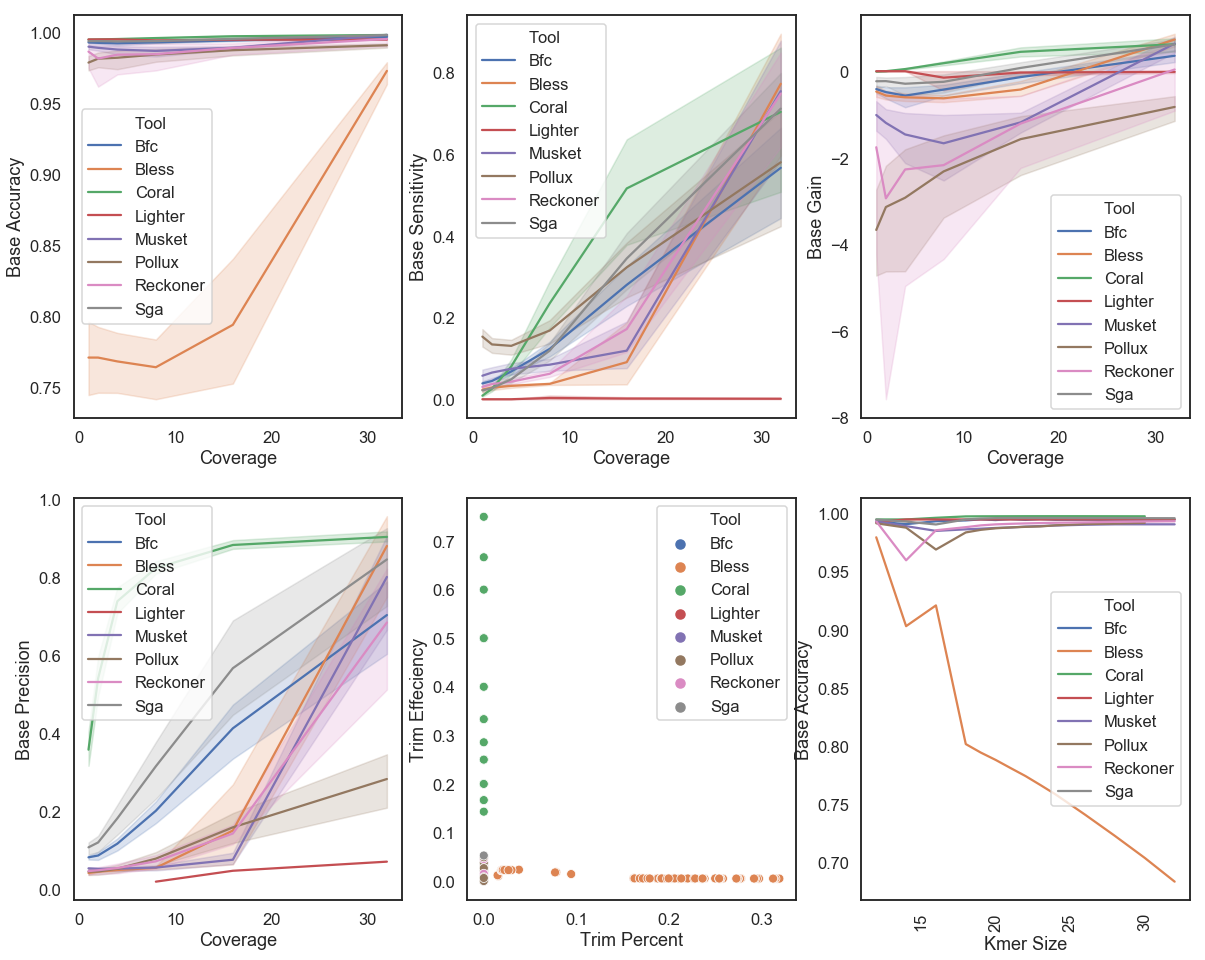

In [21]:
a4_dims = (20, 16.27)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=a4_dims)
plt.xticks(rotation='vertical')

# g = sns.boxplot(ax=axs[0], y="Trim Percent", x="Tool",
#              data=data)
# g.set_xticklabels(rotation=90, labels=data['Tool'].unique())

# g = sns.boxplot(ax=axs[1], y="Trim Effeciency", x="Tool",
#     z         data=data)
# g.set_xticklabels(rotation=90, labels =data['Tool'].unique() )

# g = sns.catplot(ax=axs[2], x="Coverage", y="Trim Effeciency",
#              hue="Tool", kind='point',
#              data=data) # no bars 

g = sns.lineplot(ax=axs[0][0], x="Coverage", y="Base Accuracy", data=data, hue='Tool')

g = sns.lineplot(ax=axs[0][1], x="Coverage", y="Base Sensitivity", data=data, hue='Tool')

g = sns.lineplot(ax=axs[0][2], x="Coverage", y="Base Gain", data=data, hue='Tool')

g = sns.lineplot(ax=axs[1][0], x="Coverage", y="Base Precision", data=data, hue='Tool')

g = sns.scatterplot(ax=axs[1][1], y="Trim Effeciency", x="Trim Percent", hue="Tool",
             data=data)

# g = sns.lineplot(ax=axs[2], x="Coverage", y="Base Gain", data=data, hue='Tool')


# fig2, axs2 = plt.subplots(ncols=3, figsize=a4_dims)

data2 = data[(data.Coverage == 16)]

g = sns.lineplot(ax=axs[1][2], x="Kmer Size", y="Base Accuracy", data=data2, hue='Tool')

# g = sns.lineplot(ax=axs2[1], x="Kmer Size", y="Base Sensitivity", data=data2, hue='Tool')

# g = sns.lineplot(ax=axs2[2], x="Kmer Size", y="Base Gain", data=data2, hue='Tool')



/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


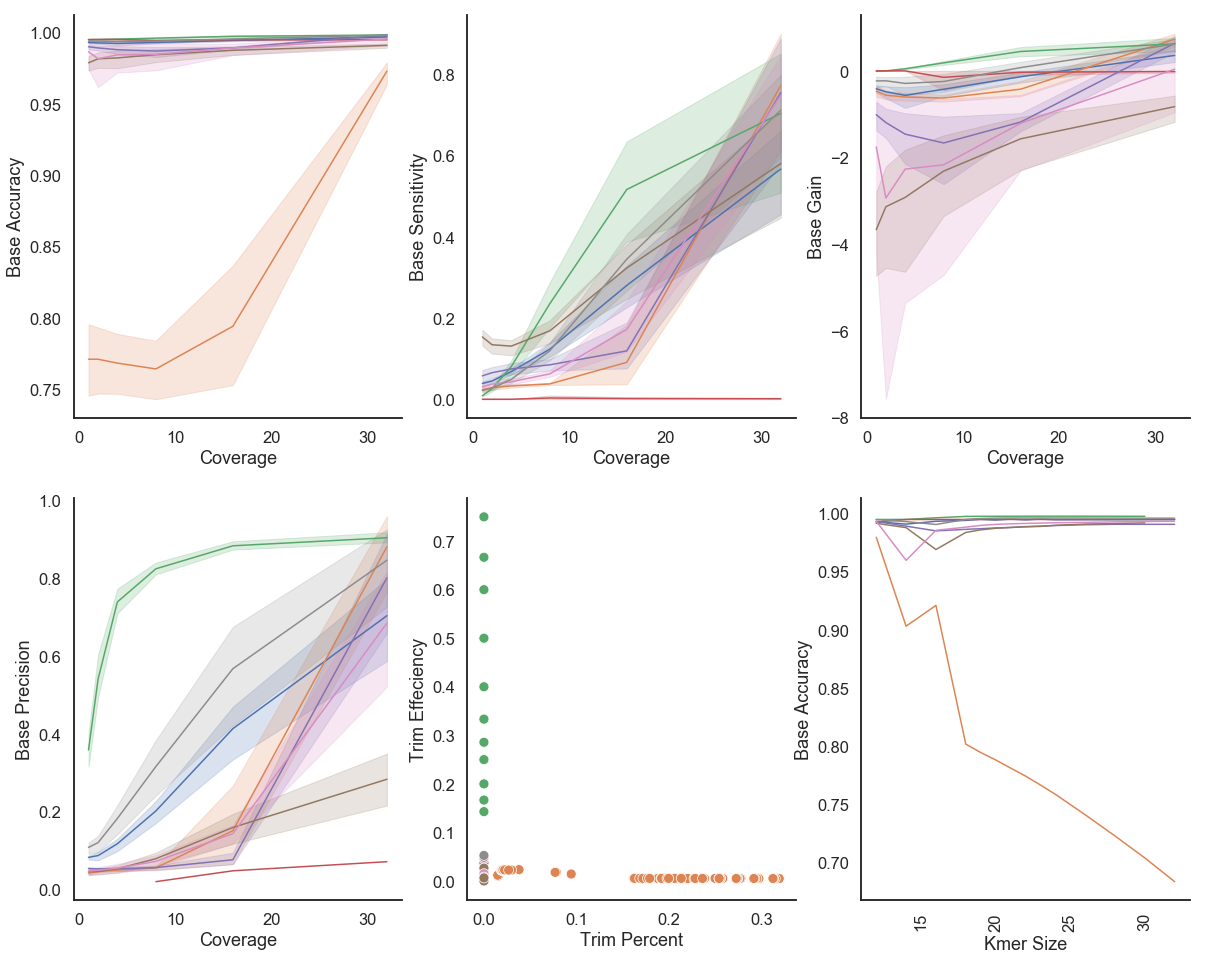

In [24]:
a4_dims = (20, 16.27)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=a4_dims)
plt.xticks(rotation='vertical')


sns.set_context('talk')
sns.set(font_scale=2)  # crazy big


g = sns.lineplot(ax=axs[0][0], x="Coverage", y="Base Accuracy", data=data, hue='Tool', legend=False)

g = sns.lineplot(ax=axs[0][1], x="Coverage", y="Base Sensitivity", data=data, hue='Tool', legend=False)

g = sns.lineplot(ax=axs[0][2], x="Coverage", y="Base Gain", data=data, hue='Tool', legend=False)

g = sns.lineplot(ax=axs[1][0], x="Coverage", y="Base Precision", data=data, hue='Tool', legend=False)

g = sns.scatterplot(ax=axs[1][1], y="Trim Effeciency", x="Trim Percent", hue="Tool", legend=False, s=100,
             data=data)



data2 = data[(data.Coverage == 16)]

g = sns.lineplot(ax=axs[1][2], x="Kmer Size", y="Base Accuracy", data=data2, hue='Tool', legend=False)


sns.set_context('talk')
sns.set_style("white")
sns.despine()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


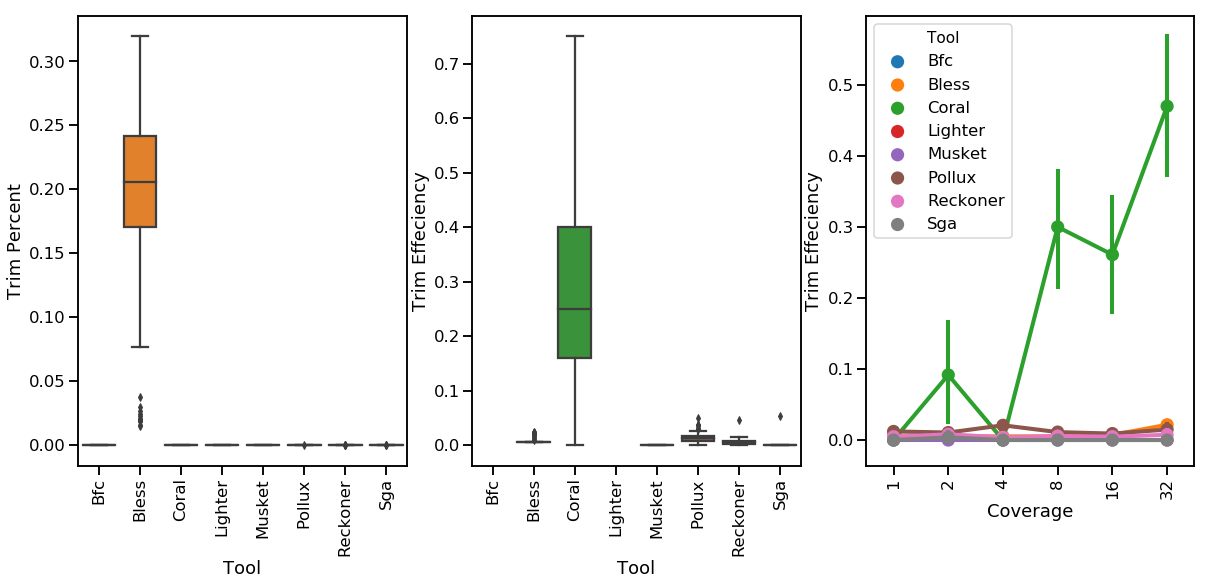

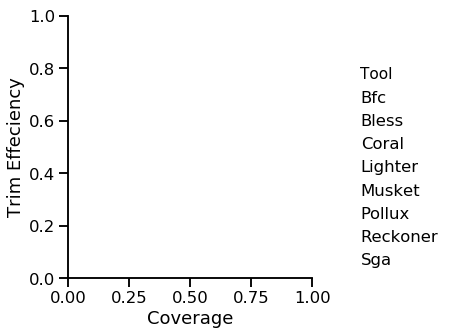

In [22]:

a4_dims = (20, 8.27)
fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
plt.xticks(rotation='vertical')

g = sns.boxplot(ax=axs[0], y="Trim Percent", x="Tool",
             data=data)
g.set_xticklabels(rotation=90, labels=data['Tool'].unique())

g = sns.boxplot(ax=axs[1], y="Trim Effeciency", x="Tool",
             data=data)
g.set_xticklabels(rotation=90, labels =data['Tool'].unique() )

g = sns.catplot(ax=axs[2], x="Coverage", y="Trim Effeciency",
             hue="Tool", kind='point',
             data=data) # no bars 

In [23]:
data_kmer = data.groupby(['Tool','Kmer Size']).mean().groupby('Tool').var()[['Base Sensitivity', 'Base Precision', 'Base Gain', 'Base Accuracy']]
data_cov = data.groupby(['Tool','Coverage']).mean().groupby('Tool').var()[['Base Sensitivity', 'Base Precision', 'Base Gain', 'Base Accuracy']]

new = pd.concat([data_cov, data_kmer], axis=1, sort=False)
new.columns = ['Base Sensitivity Variance (Coverage)', 
              'Base Precision Variance (Coverage)',
              'Base Gain Variance (Coverage)',
              'Base Accuracy Variance (Coverage)',
              'Base Sensitivity Variance (Kmer Size)',
              'Base Precision Variance (Kmer Size)',
              'Base Gain Variance (Kmer Size)',
              'Base Accuracy Variance (Kmer Size)']   

new

,Base Sensitivity Variance (Coverage),Base Precision Variance (Coverage),Base Gain Variance (Coverage),Base Accuracy Variance (Coverage),Base Sensitivity Variance (Kmer Size),Base Precision Variance (Kmer Size),Base Gain Variance (Kmer Size),Base Accuracy Variance (Kmer Size)
Tool,,,,,,,,
Bfc,0.042713,0.061135,0.117234,2.845896e-06,0.003689,0.005478,0.059081,1.409560e-06
Bless,0.089475,0.111781,0.273917,6.703748e-03,0.002761,0.002121,0.019258,1.667370e-03
Coral,0.082782,0.046800,0.068985,1.720376e-06,0.015443,0.002192,0.010189,2.541817e-07
Lighter,0.000002,0.000660,0.003422,7.233865e-08,0.000014,NaN,0.014817,3.581625e-07
Musket,0.076274,0.092193,0.679633,1.644124e-05,0.001684,0.002108,0.505889,1.199595e-05
Pollux,0.031644,0.008980,1.117964,1.944261e-05,0.007346,0.002333,2.249818,5.127672e-05
Reckoner,0.079783,0.063664,1.067036,2.331243e-05,0.001849,0.004967,12.306918,2.566805e-04
Sga,0.074657,0.086895,0.125040,3.074686e-06,0.006178,0.018794,0.079608,1.939964e-06
